# Iris Flower Classification 🌸

**Objective:**  
Classify Iris flowers into Setosa, Versicolor, or Virginica based on sepal and petal measurements.


# ✅ Step 1: Import Libraries

Importing all necessary Python libraries for:
- Data handling
- Data visualization
- Machine learning model building and evaluation


In [1]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# ✅ Step 2: Load Dataset

Load the Iris dataset CSV file into a Pandas DataFrame for further analysis and processing.


In [2]:
# Load the dataset
data = pd.read_csv('Iris.csv')  # Replace 'Iris.csv' with your actual file name if different

# Display first 5 rows
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# ✅ Step 3: Data Exploration (EDA)

In this step, we will:
- Check the shape of the dataset
- View basic information
- Check for missing values
- Get class distribution


In [10]:
pd.set_option('display.max_columns', None)

# Show all column names properly (with index)
print("📢 Actual Column Names:")
for idx, col in enumerate(data.columns):
    print(f"{idx+1}: '{col}'")

# Remove extra spaces from column names
data.columns = data.columns.str.strip()

# Show dataset shape
print("\n📦 Dataset Shape:", data.shape)

# Show first 5 rows
print("\n📄 First 5 Rows:")
print(data.head())

# Dataset basic info
print("\nℹ️ Dataset Info:")
print(data.info())

# Check for missing values
print("\n🕳️ Missing Values:")
print(data.isnull().sum())

# Show cleaned column names again for final check
print("\n✅ Cleaned Column Names:")
for idx, col in enumerate(data.columns):
    print(f"{idx+1}: '{col}'")


📢 Actual Column Names:
1: 'sepal_length'
2: 'sepal_width'
3: 'petal_length'
4: 'petal_width'
5: 'species'

📦 Dataset Shape: (150, 5)

📄 First 5 Rows:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

ℹ️ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float

# ✅ Step 4: Data Preprocessing

In this step, we will:
- Encode the target labels (if needed)
- Split the dataset into features and target
- Prepare data for model training


In [12]:
# ⚙️ Target column name (confirmed)
target_column = 'species'  # ✅ Correct column name

# ✅ Separate features and target variable
X = data.drop(target_column, axis=1)
y = data[target_column]

# ✅ Label Encoding the target labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 🔁 Show encoded labels
print("\n🗂️ Encoded Class Labels:")
for i, class_name in enumerate(le.classes_):
    print(f"{i}: {class_name}")

# ✅ Final check of features and target
print("\n📦 Features shape:", X.shape)
print("🎯 Target shape:", y_encoded.shape)



🗂️ Encoded Class Labels:
0: Iris-setosa
1: Iris-versicolor
2: Iris-virginica

📦 Features shape: (150, 4)
🎯 Target shape: (150,)


# ✅ Step 5: Data Visualization (Graphs)

In this step, we will:
- Visualize pairwise relationships between features
- Plot correlation heatmap
- Plot boxplots for each feature


# ✅ Step 5.1: Pairplot

Visualizing pairwise relationships between features and saving the plot.


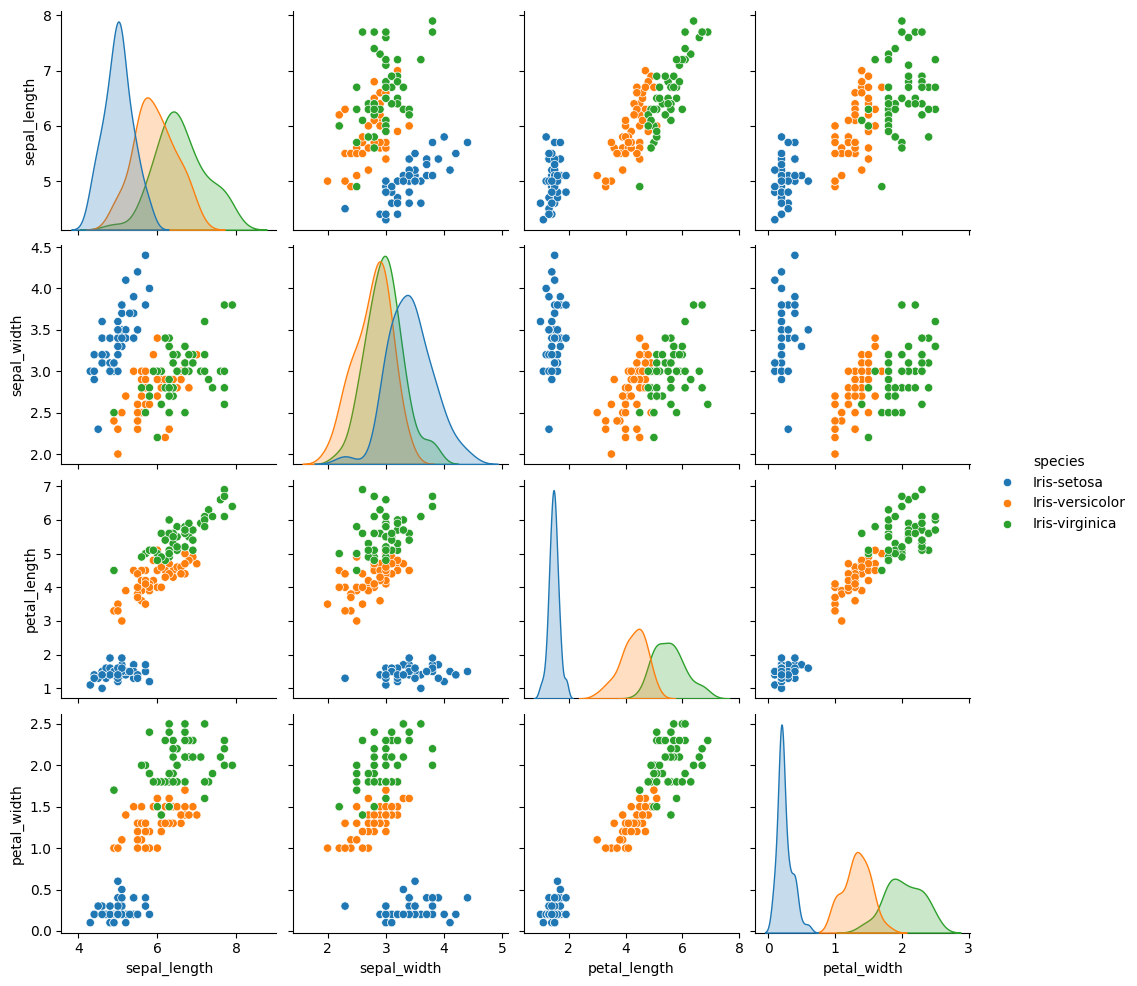

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create 'images' folder if not exists
if not os.path.exists('images'):
    os.makedirs('images')

# 📊 Pairplot
pairplot = sns.pairplot(data, hue='species')
pairplot.savefig('images/pairplot.png')  # Save the plot
plt.show()


# ✅ Step 5.2: Correlation Heatmap

Visualizing feature correlations using a heatmap.  
Only numeric columns are selected to avoid errors.


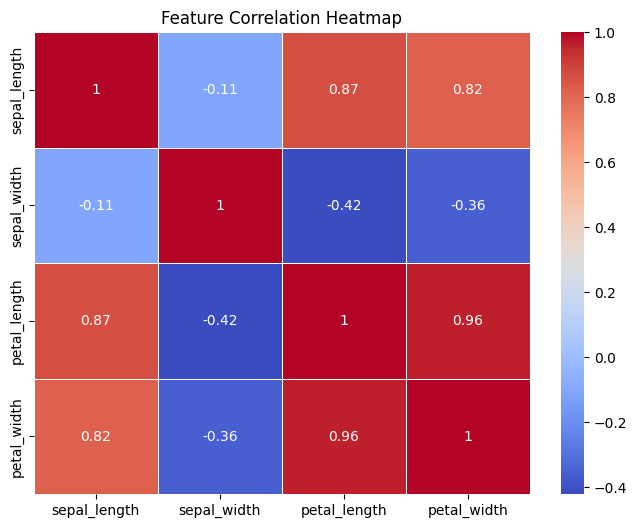

In [15]:
# 📊 Correlation Heatmap (only numeric columns)
plt.figure(figsize=(8, 6))

# Calculate correlation only on numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Feature Correlation Heatmap')
plt.savefig('images/correlation_heatmap.png')  # Save the plot
plt.show()


# ✅ Step 5.3: Boxplots for Each Feature

Boxplots for each feature by species and saving the plot.


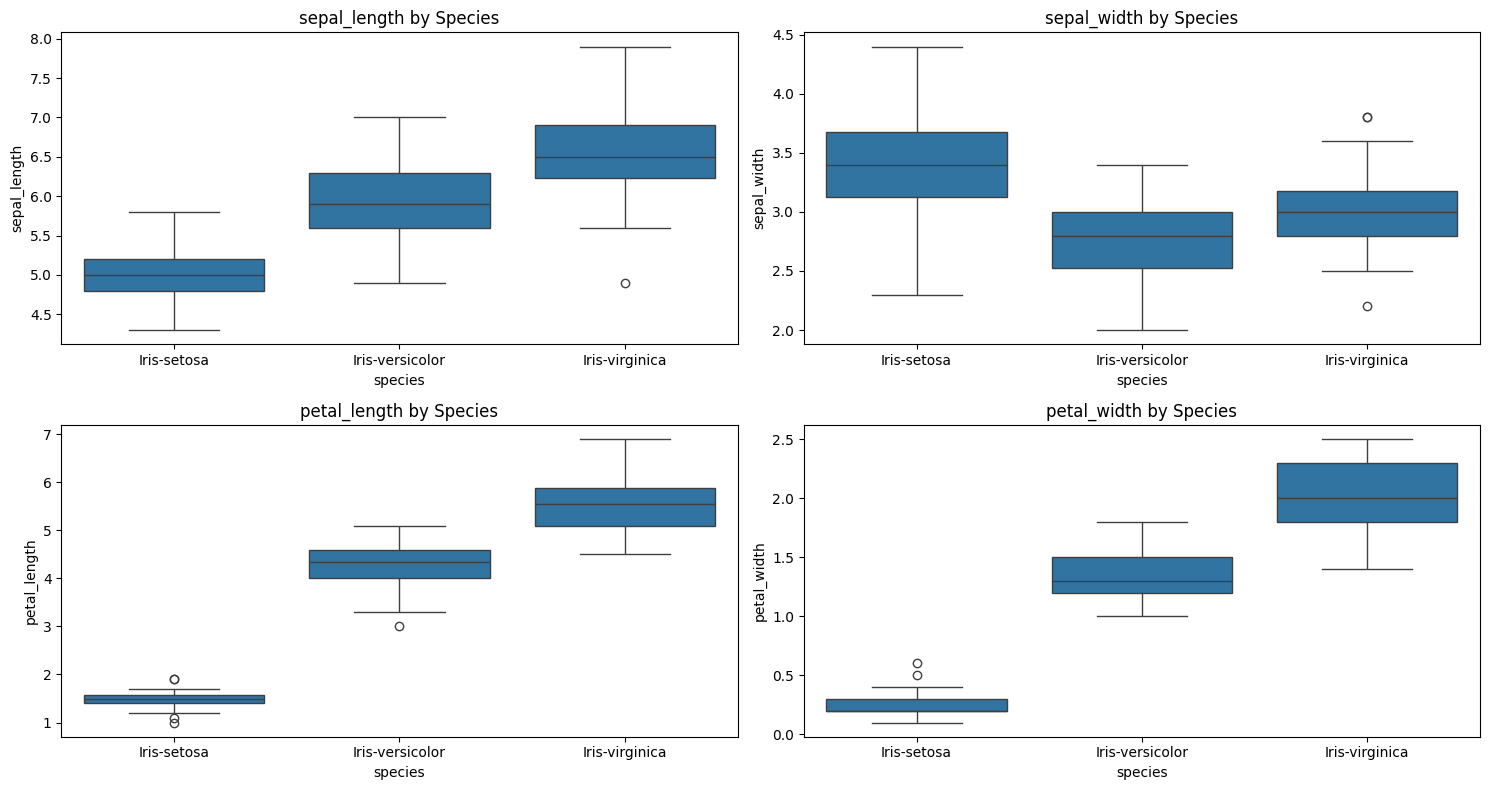

In [16]:
# 📊 Boxplots for each feature
features = X.columns

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='species', y=feature, data=data)
    plt.title(f'{feature} by Species')
    plt.tight_layout()

plt.savefig('images/boxplots.png')  # Save the plot
plt.show()


# ✅ Step 6: Train-Test Split

In this step, we will:
- Split the dataset into training and testing sets
- Use an 80:20 ratio for splitting


In [17]:
from sklearn.model_selection import train_test_split

# ✅ Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ✅ Print shapes of the splits
print("\n📦 Training Features Shape:", X_train.shape)
print("📦 Testing Features Shape:", X_test.shape)
print("🎯 Training Labels Shape:", y_train.shape)
print("🎯 Testing Labels Shape:", y_test.shape)



📦 Training Features Shape: (120, 4)
📦 Testing Features Shape: (30, 4)
🎯 Training Labels Shape: (120,)
🎯 Testing Labels Shape: (30,)


# ✅ Step 7: Model Training and Evaluation

In this step, we will:
- Train multiple machine learning models
- Evaluate their performance using accuracy and classification report


# ✅ Step 7.1: Logistic Regression Model


In [18]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n🎯 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_log))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))



🎯 Logistic Regression Accuracy: 1.0

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🧱 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# ✅ Step 7.2: Decision Tree Classifier


In [19]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluation
print("\n🎯 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_tree))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))



🎯 Decision Tree Accuracy: 1.0

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🧱 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# ✅ Step 7.3: K-Nearest Neighbors (KNN)


In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluation
print("\n🎯 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



🎯 KNN Accuracy: 1.0

📄 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


🧱 Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# ✅ Step 8: Final Model Selection and Conclusion

In this step, we will:
- Compare the performance of all trained models
- Select the best-performing model based on accuracy
- Conclude the project


In [21]:
# ✅ Compare model accuracies
log_acc = accuracy_score(y_test, y_pred_log)
tree_acc = accuracy_score(y_test, y_pred_tree)
knn_acc = accuracy_score(y_test, y_pred_knn)

print("\n📊 Model Accuracies:")
print(f"Logistic Regression Accuracy: {log_acc * 100:.2f}%")
print(f"Decision Tree Accuracy: {tree_acc * 100:.2f}%")
print(f"KNN Accuracy: {knn_acc * 100:.2f}%")

# ✅ Select the best model
accuracies = {'Logistic Regression': log_acc, 'Decision Tree': tree_acc, 'KNN': knn_acc}
best_model = max(accuracies, key=accuracies.get)

print(f"\n🏆 Best Performing Model: {best_model} with Accuracy: {accuracies[best_model] * 100:.2f}%")



📊 Model Accuracies:
Logistic Regression Accuracy: 100.00%
Decision Tree Accuracy: 100.00%
KNN Accuracy: 100.00%

🏆 Best Performing Model: Logistic Regression with Accuracy: 100.00%
